# Task 1 (5 points)

Given a system:

<!-- A =
    [0 0 1 0;
     0 0 0 1;
     n -2 -10/n -2;
     -5 -n/10 0 -3]; -->

$
\begin{cases}
\dot x =
\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
 n & -2 & -10/n & -2 \\
-5 & -n/10 & 0 & -3
\end{bmatrix}
x
+
\begin{bmatrix}
0 \\
0 \\
-1\\
1
\end{bmatrix}
u \\
y = \begin{bmatrix}
1 & 1 & 0 & 0
\end{bmatrix} x
\end{cases}
$

where $n$ is my number in my group list - 2.



1. Find its transfer function representation ($y(s) / u(s) = W(s)$).

In [312]:
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import solve_continuous_are as are
from matplotlib.pyplot import *
from IPython.display import display
import sympy
from sympy import Matrix, diag, symbols, init_printing, pprint, factor, zeros, simplify, latex

A = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [2, -2, -10 / 2, -2], [-5, -2 / 10, 0, -3]])
B = np.array([[0], [0], [-1], [1]])

In [313]:


init_printing(use_unicode=True)


def find_w():
    M = Matrix([[s, 0, 0, 0], [0, s, 0, 0], [0, 0, s, 0], [0, 0, 0, s]])
    M = M - A
    return simplify(sympy.apart(simplify(C * (M.inv() * B)), s))


s = symbols('s')
n = symbols('n')

Am = Matrix([[0, 0, 1, 0], [0, 0, 0, 1], [n, -2, -10 / n, -2], [-5, -n / 10, 0, -3]])
Bm = Matrix([[0], [0], [-1], [1]])
Cm = Matrix([1, 1, 0, 0]).transpose()

print("Let's use formula W(s) = Y(s)/u(s) = C *(sI - A)^(-1)*B:")
W = find_w()
W = W.subs(n, 2)
display("W(s) = ", W)


Let's use formula W(s) = Y(s)/u(s) = C *(sI - A)^(-1)*B:


'W(s) = '

⎡                                10                         9                 
⎢          1.51191284717805e-20⋅s   + 2.22707162250989e-19⋅s  + 5.268270890279
⎢─────────────────────────────────────────────────────────────────────────────
⎢                    12                        11                         10  
⎣6.5853386128432e-7⋅s   + 1.71218803933923e-5⋅s   + 0.000112872703824133⋅s   -

       8                        7                        6                    
22e-7⋅s  + 9.48288760248981e-6⋅s  + 7.48094466416828e-6⋅s  - 0.000545266037143
──────────────────────────────────────────────────────────────────────────────
                       9                        8                       7     
 0.000460183462265483⋅s  - 0.00726505092310643⋅s  - 0.0128327176480753⋅s  + 0.

     5                        4                        3                      
456⋅s  - 0.00140093859514185⋅s  + 0.00834968253399625⋅s  + 0.0233460263539983⋅
──────────────────────────────────────────────────

## 2.  Propose an ODE representation of the system.
\begin{equation}
    \begin{cases}
        x_1' = x_3\\
        x_2' = x_4\\
        x_3' = 2x_1 - 2x_2 - 5x_3 - 2x_4 - u\\
        x_4' = -5x_1 - 0.2x_2 - 3x_4 + u\\
        y = x_1 + x_2
    \end{cases}\,
\end{equation}

\begin{equation}
    \begin{cases}
        x_1'' = 2x_1 - 2x_2 - 5(x_1' +С_1) - 2(x_2'+ С_2) - u\\
        x_2'' = -5x_1 - 0.2x_2 - 3(x_2'+С_2) + u\\
        y = x_1 + x_2
    \end{cases}\,
\end{equation}

## 3. Propose a controller (control law $u = -Kx$) that makes the system stable. Do it via pole placement and as an LQR. For LQR show the cost function you chose.

To propose the controller, which make the system stable, rewrite the control law $u=-Kx$ into the state space form: $x'=(A-KB)x$. Now let's choose the K with 1- pole-placement and 2- LQR!
But to do it check are the methods applicable:
1- find is the system controllable,
2- find is the system observable.

In [315]:
def rank_for_check_controllability(A, B):
    R = Matrix([[0, 0, 0, 0], [0, 0, 0, 0, ], [0, 0, 0, 0], [0, 0, 0, 0]])
    R[0] = B
    R[1] = A * B
    R[2] = A * A * B
    R[3] = A * A * A * B
    rank = R.rank()
    print("Rank of the matrix R = [B AB AAB ... A^(n-1)B] is equal to ", rank)
    result = rank == R.shape[0]
    if result:
        outputStr = "The system is controllable"
    else:
        outputStr = "The system is uncontrollable"
    print(outputStr)
    return result


def rank_for_check_observability(C, A):
    O = Matrix([[0, 0, 0, 0], [0, 0, 0, 0, ], [0, 0, 0, 0], [0, 0, 0, 0]])
    Ct = C.transpose()
    At = A.transpose()
    O[0] = Ct
    O[1] = At * Ct
    O[2] = At * At * Ct
    O[3] = At * At * At * Ct
    rank = O.rank()
    print("Rank of the matrix O = [Ct AtCt AtCt ... At^(n-1)Ct] is equal to ", rank)
    result = rank == O.shape[0]
    if result:
        outputStr = "The system is observable"
    else:
        outputStr = "The system is unobservable"
    print(outputStr)
    return result


if rank_for_check_controllability(Am, Bm):
    if rank_for_check_observability(Cm, Am):
        print("We can use pool-placement for the system or LQR\nLet's do it!")
else:
    print("We can't use pool-placement and LQR :C")


Rank of the matrix R = [B AB AAB ... A^(n-1)B] is equal to  4
The system is controllable
Rank of the matrix O = [Ct AtCt AtCt ... At^(n-1)Ct] is equal to  4
The system is observable
We can use pool-placement for the system or LQR
Let's do it!


Use Pole Placement from scipy:

In [316]:
from scipy.signal import place_poles, ss2tf

#The system is stable when the real part of its eigenvalues are negative, so create a set of 4 negative real eigenvalues

eigP_desired = np.random.uniform(-10, -1, size=(4,))
print("Desired pole placement eigenvalues :", eigP_desired)
place_poles = place_poles(A, B, eigP_desired)
Kpp = place_poles.gain_matrix
print("Martix K:", Kpp)

Desired pole placement eigenvalues : [-4.59591677 -1.56581897 -4.32966636 -6.61768671]
Martix K: [[103.64899352 148.20699529  25.26541758  34.37450639]]


Use LQR:

In [348]:
import numpy as np


def lqr(A, B, Q, R):
    # Solve the ARE
    S = are(A, B, Q, R)
    R_inv = np.linalg.inv(R)
    Klqr = R_inv.dot((B.T).dot(S))
    Ac = A - B.dot(Klqr)
    E = np.linalg.eigvals(Ac)
    return S, K, E


def system_ode(x, t, A, B, Klqr):
    u = -np.dot(Klqr, x)
    dx = np.dot(A, x) + np.dot(B, u)
    return dx


t0 = 0  # Initial time
tf = 15  # Final time
N = int(2E3)  # Numbers of points in time span
t = np.linspace(t0, tf, N)  # Create time span
y_0 = 0.5
x0 = [0, 0, 0, 0]  # Set initial state

Q = np.diag([1, 1, 1, 1])  #Set costs
R = np.diag([1])
S, K, E = lqr(A, B, Q, R)
x_sol = odeint(system_ode, x0, t, args=(A, B, K))  # integrate system "sys_ode" from initial state $x0$

simulations = {'fast': {'R': R / 10}, 'slow': {'R': R * 5}}

print("Martix K:", K)


Martix K: [[-6.86487908  1.94316742 -1.14482729  1.05287345]]


## 4. Show stability of the closed-loop system via eigenvalue analysis.

### Find eigenvalues for system with K from pole placement:

Martix K: [[103.64899352 148.20699529  25.26541758  34.37450639]]
Eigenvalues for K from polePlacement:
 [-0.52507157+0.j        -1.07337208+0.j        -4.29962854+0.4480173j
 -4.29962854-0.4480173j] 
Desired eigenvalues: [-4.59591677 -1.56581897 -4.32966636 -6.61768671]
The system is stable


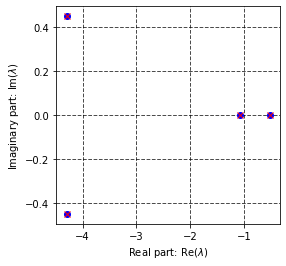

In [321]:
eigP = np.linalg.eigvals(A - B @ K)

for sim_type in simulations.keys():
    R = simulations[sim_type]['R']
    simulations[sim_type]['eigs'] = eigP
    simulations[sim_type]['K'] = Kpp
    simulations[sim_type]['x'] = odeint(system_ode, x0, t, args=(A, B, K))
    simulations[sim_type]['u'] = - K.dot(x_sol.T).T

print("Martix K:", Kpp)
print("Eigenvalues for K from polePlacement:\n", eigP, "\nDesired eigenvalues:", eigP_desired)
if eigP.max() < 0:
    print("The system is stable")
else:
    print("The system is unstable")

figure(figsize=(4, 4))
plot(simulations['fast']['eigs'].real, simulations['fast']['eigs'].imag, 'bo', label='Fast')
plot(simulations['slow']['eigs'].real, simulations['slow']['eigs'].imag, 'rx',
     label='Slow')
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
grid(True)
xlabel(r'Real part: ${ \operatorname{Re}(\lambda)}$')
ylabel(r'Imaginary part: ${ \operatorname{Im}(\lambda)}$')
show()

### Find eigenvalues for system with K from LQR:

Eigenvalues for LQR are equal to:  [-0.53034896+0.j         -1.06774362+0.j         -4.39286711+0.45602049j
 -4.39286711-0.45602049j]


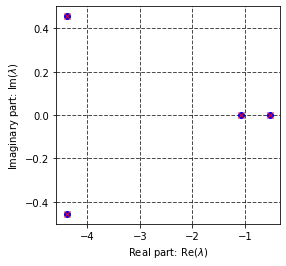

In [371]:
print("Eigenvalues for LQR are equal to: ", E)
for sim_type in simulations.keys():
    R = simulations[sim_type]['R']
    S, K, E = lqr(A, B, Q, R)
    simulations[sim_type]['eigs'] = E
    simulations[sim_type]['K'] = K
    simulations[sim_type]['x'] = odeint(system_ode, x0, t, args=(A, B, K))
    simulations[sim_type]['u'] = - K.dot(x_sol.T).T
figure(figsize=(4, 4))
plot(simulations['fast']['eigs'].real, simulations['fast']['eigs'].imag, 'bo', label='Fast')
plot(simulations['slow']['eigs'].real, simulations['slow']['eigs'].imag, 'rx',
     label='Slow')
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
grid(True)
xlabel(r'Real part: ${ \operatorname{Re}(\lambda)}$')
ylabel(r'Imaginary part: ${ \operatorname{Im}(\lambda)}$')
show()

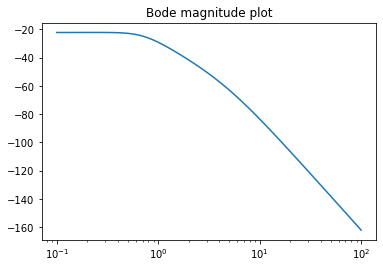

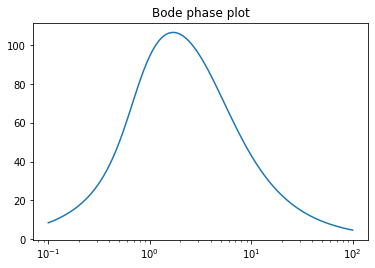

In [338]:
from scipy import signal
import matplotlib.pyplot as plt
import scipy
from sympy.abc import j, w

# a(ω) = |W(jω)| and its phase
# ϕ(ω) = atan2(im(W(jω)), real(W(jω)))

sys = signal.TransferFunction([16], [20, 160, 264, -300, 208])
array_w, mag, phase = signal.bode(sys)

plt.figure()
plt.title('Bode magnitude plot')
plt.semilogx(array_w, mag)
plt.figure()
plt.title('Bode phase plot')
plt.semilogx(array_w, phase)
plt.show()

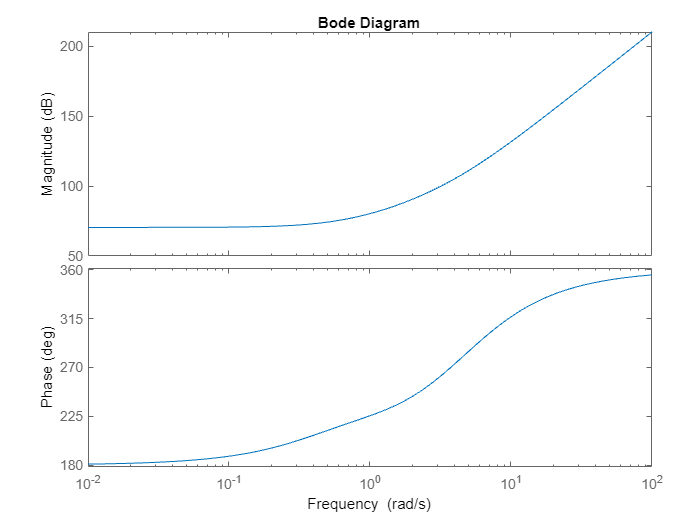

I have a different plot that MATLAB does...
But after analyzing both graphs, it seems that the system does not reach the gain margin ($gain(\omega) != 0$ or $(phase(\omega) != -180$ for any frequency value), so the system is stable!
Moreover, MATLAB says there is no stability margin.

## 6. Modify the control law
in such a way that the state of the system converges to $x_0 = \begin{bmatrix}
(2+0.1n)/(n-5) \\
1 \\
0 \\
0
\end{bmatrix}$. Show resulting control law. Simulate the system and demostrate convergence via graphs of state dynamics and error dynamics.

In [376]:

t0 = 0  # Initial time
tf = 15  # Final time
N = int(2E3)  # Numbers of points in time span
t = np.linspace(t0, tf, N)  # Create time span
y_0 = 0.5
C = np.array([-2.2 / 3, 1, 0, 0])  # initial state, in affine control we will use the state as C
x_sol = odeint(system_ode, C, t, args=(A, B, K))  # integrate system "sys_ode" from initial state $x0$

Q = np.diag([1, 1, 1, 1])
R = np.diag([1])
simulations = {'fast': {'R': R}, 'slow': {'R': R}}

print("Martix K:", K)

Martix K: [[-6.86487908  1.94316742 -1.14482729  1.05287345]]


#### $u = \begin{bmatrix}
6.84\\
-1.94\\
1.14\\
-1.05
\end{bmatrix} x$

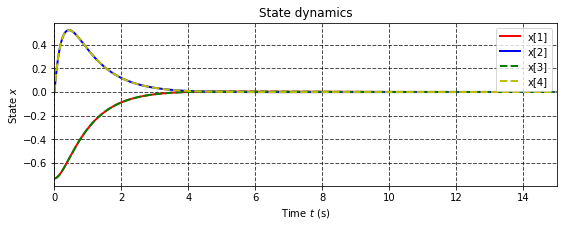

In [375]:
e0 = [0, 0, 0, 0]

for sim_type in simulations.keys():
    R = simulations[sim_type]['R']
    S, K, E = lqr(A, B, Q, R)
    simulations[sim_type]['eigs'] = E
    simulations[sim_type]['K'] = K
    simulations[sim_type]['x'] = odeint(system_ode, x0, t, args=(A, B, K))
    # u_star = np.linalg.pinv(B) * (x_sol - A * C)
    # simulations[sim_type]['error'] = A*
    simulations[sim_type]['u'] = - K.dot(x_sol.T).T

figure(figsize=(9, 3))
plot(t, simulations['slow']['x'][:, 0], 'r', linewidth=2.0, label='x[1]')
plot(t, simulations['slow']['x'][:, 2], 'b', linewidth=2.0, label='x[2]')
plot(t, simulations['fast']['x'][:, 0], 'g--', linewidth=2.0, label='x[3]')
plot(t, simulations['fast']['x'][:, 2], 'y--', linewidth=2.0, label='x[4]')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
grid(True)
xlim([t0, tf])
ylabel(r'State ${x}$')
xlabel(r'Time $t$ (s)')
title('State dynamics')
show()

To determine error dynamics, use the formula from affine control $u^{*} = B^{+}(\dot x^{*} - Ax^{*})$

In [365]:
u_star = np.linalg.pinv(B) * (x_sol[0] - A * C)
print(u_star)

[[-0.  0. -0.  0.]
 [-0.  0. -0.  0.]
 [ 0.  0. -0.  0.]
 [-0.  0. -0.  0.]]


Since $u^* = 0$, $v=u$
#### The final error dynamical system equation is: $\dot e = Ae+Bu$

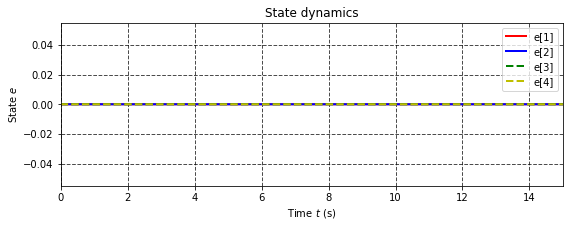

In [377]:
e0 = [0, 0, 0, 0]
for sim_type in simulations.keys():
    simulations[sim_type]['e'] = odeint(system_ode, e0, t, args=(A, B, K))


figure(figsize=(9, 3))
plot(t, simulations['slow']['e'][:, 0], 'r', linewidth=2.0, label='e[1]')
plot(t, simulations['slow']['e'][:, 2], 'b', linewidth=2.0, label='e[2]')
plot(t, simulations['fast']['e'][:, 0], 'g--', linewidth=2.0, label='e[3]')
plot(t, simulations['fast']['e'][:, 2], 'y--', linewidth=2.0, label='e[4]')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
grid(True)
xlim([t0, tf])
ylabel(r'State ${e}$')
xlabel(r'Time $t$ (s)')
title('State dynamics')
show()

## 8.Discretize the system with $\Delta t = 0.01$. Write equations of the discrete dynamics.
$ \dot x \approx \frac{1}{\Delta t}*(x(t)-x(t-\Delta t)) \\
\dot x \approx \frac{1}{\Delta t}*(x_{i+1}-x_{i}) = Ax_i \\
x_{i+1} = (I - A \Delta t)^{-1} x_i$


Define discrete state space matrix $\bar{A} = A \Delta t + I$ and discrete control matrix $\bar{B} = B \Delta t\\$.
So, we get the discrete dynamics system:
$\begin{cases}x_{i+1} = \bar{A} x_i + \bar{B} u_i\\
y_{i+1} = Cx_i\end{cases}$

In [383]:
dt = 0.01
I = np.diag([1, 1, 1, 1])
Ad = I + A*dt
Bd = B*dt
print("Ad =",Ad,"\nBd=", Bd)

Ad = [[ 1.     0.     0.01   0.   ]
 [ 0.     1.     0.     0.01 ]
 [ 0.02  -0.02   0.95  -0.02 ]
 [-0.05  -0.002  0.     0.97 ]] 
Bd= [[ 0.  ]
 [ 0.  ]
 [-0.01]
 [ 0.01]]


It is easy to write down the equation for the system dynamics:
$\begin{cases}x_{i+1} = \begin{bmatrix} 1& 0& 0.01&0\\
 0&1&0&0.01\\
 0.02& -0.02& 0.95& -0.02\\
 -0.05 & -0.002&0& 0.97
 \end{bmatrix}x_i + \begin{bmatrix} 0\\0\\-0.01\\0.01 \end{bmatrix} u_i\\
y_{i+1} = \begin{bmatrix} 1&1&0&0
\end{bmatrix}x_i\end{cases}$

## 9. Propose a control law for the discrete system via pole-placement and LQR (show cost function for the LQR).